In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import signal
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 8

In [2]:
df_age = pd.read_csv('C:/Users/12489/ALOKPARNA/Masters@WSU/Fall2020/Intelligent_Systems/Project_Tourism/Data/Enter_korea_by_age.csv', parse_dates=['date'])
df_gender = pd.read_csv('C:/Users/12489/ALOKPARNA/Masters@WSU/Fall2020/Intelligent_Systems/Project_Tourism/Data/Enter_korea_by_gender.csv', parse_dates=['date'])
df_purpose = pd.read_csv('C:/Users/12489/ALOKPARNA/Masters@WSU/Fall2020/Intelligent_Systems/Project_Tourism/Data/Enter_korea_by_purpose.csv', parse_dates=['date'])

In [3]:
df_age

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-01-01,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-01-01,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-01-01,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566
3,2019-01-01,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137
4,2019-01-01,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92
...,...,...,...,...,...,...,...,...,...,...,...
955,2020-04-01,Oceania others,13,-97.239915,0.044195,0,0,0,0,0,0
956,2020-04-01,South Africa,22,-98.101812,0.074792,0,1,4,0,0,0
957,2020-04-01,Africa others,177,-95.412131,0.601734,3,9,16,6,2,0
958,2020-04-01,Stateless,3,-95.312500,0.010199,0,0,0,0,0,0


In [4]:
df_gender

,date,nation,visitor,growth,share,male,female,crewman
0,2019-01-01,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-01-01,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-01-01,Taiwan,87954,16.003693,7.961057,30805,56202,947
3,2019-01-01,Hong Kong,35896,3.533212,3.249086,12172,22729,995
4,2019-01-01,Macao,2570,-12.376406,0.232621,748,1787,35
...,...,...,...,...,...,...,...,...
955,2020-04-01,Oceania others,13,-97.239915,0.044195,0,0,13
956,2020-04-01,South Africa,22,-98.101812,0.074792,3,2,17
957,2020-04-01,Africa others,177,-95.412131,0.601734,30,6,141
958,2020-04-01,Stateless,3,-95.312500,0.010199,0,0,3


In [5]:
df_purpose

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-01-01,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-01-01,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-01-01,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-01-01,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-01-01,Macao,2570,-12.376406,0.232621,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...
955,2020-04-01,Oceania others,13,-97.239915,0.044195,0,0,0,0,13
956,2020-04-01,South Africa,22,-98.101812,0.074792,2,0,0,0,20
957,2020-04-01,Africa others,177,-95.412131,0.601734,11,5,0,11,150
958,2020-04-01,Stateless,3,-95.312500,0.010199,0,0,0,0,3


In [6]:
# df = pd.merge(df_purpose, df_gender, on=['date', 'nation', 'visitor', 'growth', 'share'])
# df = pd.merge(df, df_age, on=['date', 'nation', 'visitor', 'growth', 'share'])
# df

In [7]:
# Adding a filter to the nation column to get the data for China
df_age_china = df_age.loc[df_age['nation'] == 'China']
df_age_china

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-01-01,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
60,2019-02-01,China,453379,31.284441,37.724933,33333,136272,122438,64289,51696,35050
120,2019-03-01,China,487623,20.874389,31.753711,14459,137271,133971,64975,63774,60503
180,2019-04-01,China,493250,34.545722,30.166978,16492,134102,139617,65302,62969,61204
240,2019-05-01,China,500413,35.165657,33.682331,17011,138797,141104,66171,63504,58996
300,2019-06-01,China,475007,25.037708,32.177294,27351,138838,133662,60406,54228,47686
360,2019-07-01,China,519132,26.513573,35.849999,73000,136470,132334,67717,50810,45511
420,2019-08-01,China,578112,20.908521,36.444075,78339,160089,142873,76689,57236,46840
480,2019-09-01,China,541350,24.564249,37.087302,23689,168939,153165,67744,63315,52249
540,2019-10-01,China,567695,19.437542,34.277063,24779,174516,152825,69650,69340,62401


In [8]:
df_age_china = df_age_china.drop(columns=['nation', 'visitor', 'growth', 'share'])
df_age_china = df_age_china.set_index('date')
df_age_china = df_age_china.rename(columns = {"age0-20":"age0_20", "age21-30":"age21_30", "age31-40":"age31_40",
                                              "age41-50":"age41_50", "age51-60":"age51_60"})
df_age_china

,age0_20,age21_30,age31_40,age41_50,age51_60,age61
date,,,,,,
2019-01-01,36520,108591,103657,48574,40893,40998
2019-02-01,33333,136272,122438,64289,51696,35050
2019-03-01,14459,137271,133971,64975,63774,60503
2019-04-01,16492,134102,139617,65302,62969,61204
2019-05-01,17011,138797,141104,66171,63504,58996
2019-06-01,27351,138838,133662,60406,54228,47686
2019-07-01,73000,136470,132334,67717,50810,45511
2019-08-01,78339,160089,142873,76689,57236,46840
2019-09-01,23689,168939,153165,67744,63315,52249


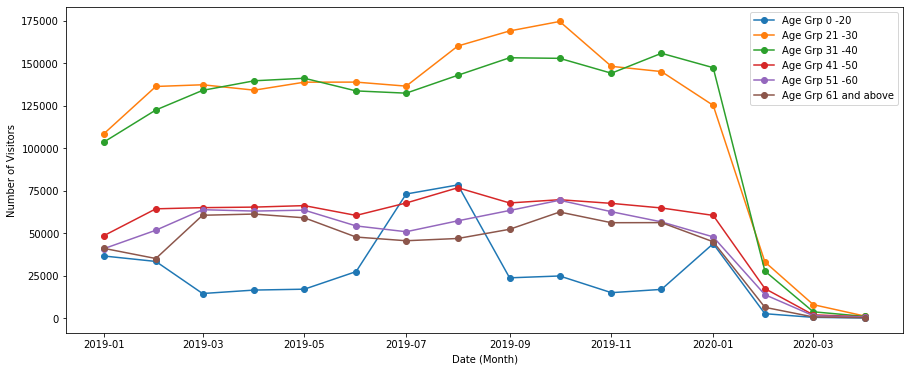

In [9]:
# Plotting the no. of visitors according to age grp who are from china
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age_china.age0_20, marker="o", label="Age Grp 0 -20")
ax.plot(df_age_china.age21_30, marker="o", label="Age Grp 21 -30")
ax.plot(df_age_china.age31_40, marker="o", label="Age Grp 31 -40")
ax.plot(df_age_china.age41_50, marker="o", label="Age Grp 41 -50")
ax.plot(df_age_china.age51_60, marker="o", label="Age Grp 51 -60")
ax.plot(df_age_china.age61, marker="o", label="Age Grp 61 and above")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

In [10]:
df_age_china['ageBelow_30'] = df_age_china['age0_20'] + df_age_china['age21_30']
df_age_china['age30_50'] = df_age_china['age31_40'] + df_age_china['age41_50']
df_age_china['age50_above'] = df_age_china['age51_60'] + df_age_china['age61']
df_age_china = df_age_china.drop(columns=['age0_20', 'age21_30', 'age31_40', 'age41_50', 'age51_60', 'age61'])
df_age_china
# # Training Dataset: Tourist data for the year 2019
# df_age_china2019 = df_age_china['2019-01-01':'2020-01-01']
# df_age_china2019

,ageBelow_30,age30_50,age50_above
date,,,
2019-01-01,145111,152231,81891
2019-02-01,169605,186727,86746
2019-03-01,151730,198946,124277
2019-04-01,150594,204919,124173
2019-05-01,155808,207275,122500
2019-06-01,166189,194068,101914
2019-07-01,209470,200051,96321
2019-08-01,238428,219562,104076
2019-09-01,192628,220909,115564


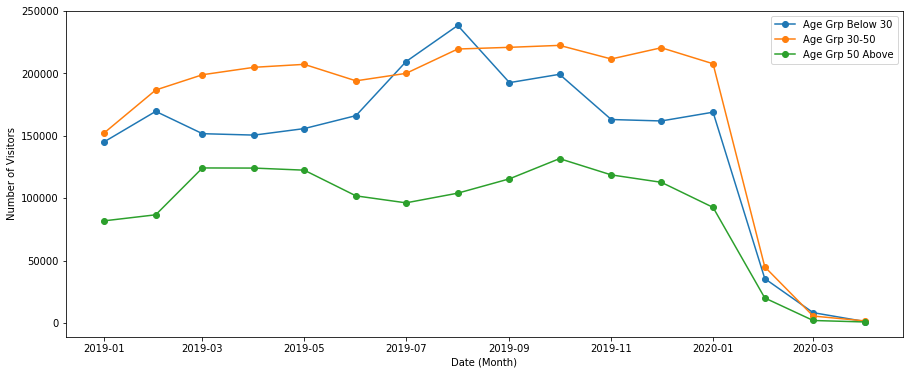

In [11]:
# Plotting the no. of visitors according to age grp who are from china
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age_china.ageBelow_30, marker="o", label="Age Grp Below 30")
ax.plot(df_age_china.age30_50, marker="o", label="Age Grp 30-50")
ax.plot(df_age_china.age50_above, marker="o", label="Age Grp 50 Above")
ax.set_xlabel("Date (Month)")
ax.set_ylabel("Number of Visitors")
ax.legend(loc=1)
plt.show()

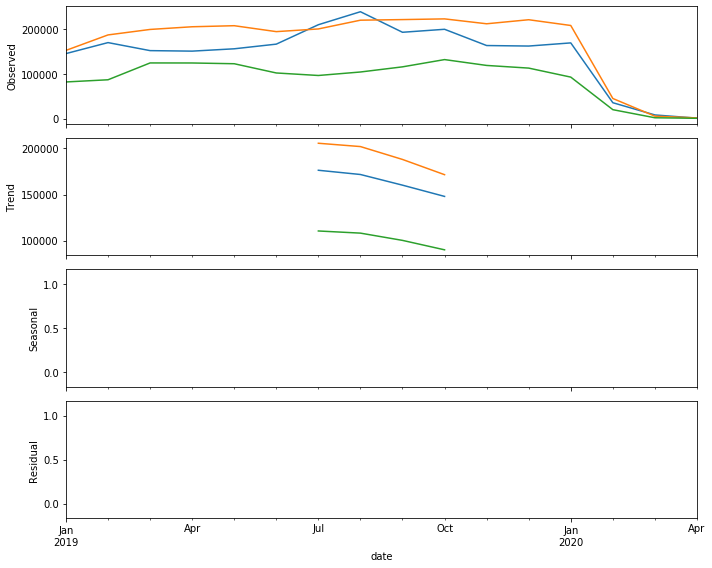

In [12]:
plt.rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df_age_china)
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
dfAgeBelow_30 = df_age_china['ageBelow_30']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfAgeBelow_30,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:404.15850887320545
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:87.61167382998177
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:104.51002054157902
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:369.33807979193944
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:108.92548561571274
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:340.1976395511654
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:48.09672778790748
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:78.36547417527802
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:318.76728477269285
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:76.57899176885921
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:364.7737116510026
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:81.03994568927679
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:75.15532001830564
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:343.02167147564006
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:77.62623762515688
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:341.98658707180033
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 

In [15]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(dfAgeBelow_30,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        ageBelow_30   No. Observations:                   16
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -19.333
Date:                            Sun, 06 Dec 2020   AIC                             42.666
Time:                                    00:05:30   BIC                             40.053
Sample:                                01-01-2019   HQIC                            37.200
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0615      0.204      0.302      0.762      -0.338       0.461
sigma2      1.458e+07      2e-09   

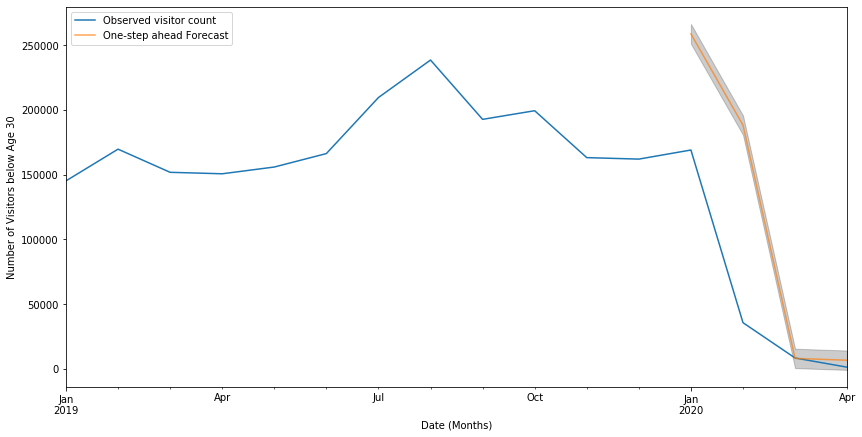

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfAgeBelow_30.plot(label='Observed visitor count', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors below Age 30')
plt.legend()
plt.show()

In [17]:
dfAge30_50 = df_age_china['age30_50']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfAge30_50,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:408.67146607520465
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:90.75081546757114
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:106.67141234176574
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:372.86947913161436
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:110.03853428544976
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:342.21216427523217
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:50.09667325408815
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:70.8102244757136
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:319.51877093524
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:76.3271869510141
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:367.3459243085598
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:82.57299796819555
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:75.67557100373469
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:343.5778753667954
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:77.74544200105325
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:342.8198193932304
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:

In [18]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(dfAge30_50,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           age30_50   No. Observations:                   16
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -18.483
Date:                            Sun, 06 Dec 2020   AIC                             40.966
Time:                                    00:05:31   BIC                             38.352
Sample:                                01-01-2019   HQIC                            35.500
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2571      0.025     10.286      0.000       0.208       0.306
sigma2      6.232e+06   6.18e-11   

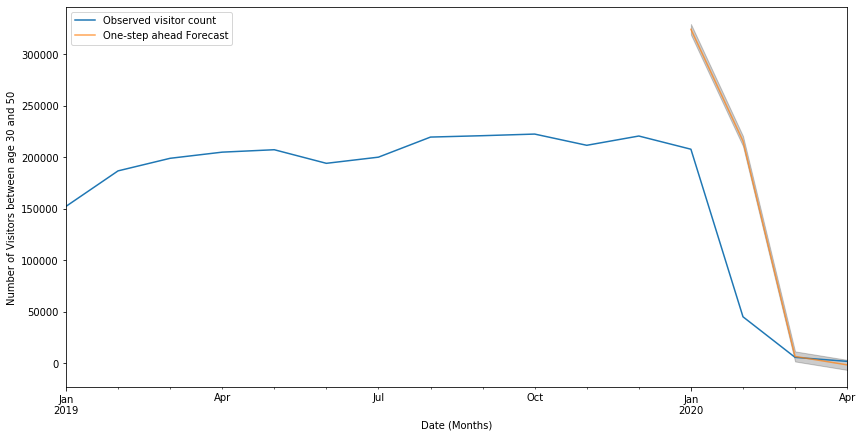

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfAge30_50.plot(label='Observed visitor count', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors between age 30 and 50')
plt.legend()
plt.show()

In [20]:
dfAgeAbove_50 = df_age_china['age50_above']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfAgeAbove_50,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:390.0003636924837
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:82.4578587106914
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:100.43306980959892
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:355.072206761677
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:105.1653793312788
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:325.0343206390097
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:51.42979533316132
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:76.12789604772203
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:300.28456731173344
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:73.99398600181016
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:348.31657360237153
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:77.85115165308729
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:71.87022905408938
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:325.75018041083956
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:73.19387937505579
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:324.5912816196577
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC

In [21]:
# Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(dfAgeAbove_50,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        age50_above   No. Observations:                   16
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -22.861
Date:                            Sun, 06 Dec 2020   AIC                             49.722
Time:                                    00:05:33   BIC                             47.108
Sample:                                01-01-2019   HQIC                            44.256
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4803      0.247      1.946      0.052      -0.003       0.964
sigma2      4.966e+08   2.78e-11   

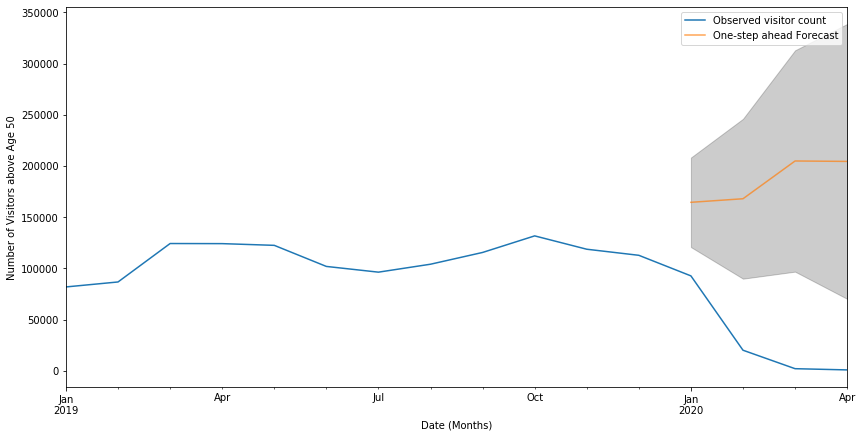

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True)
pred_ci = pred.conf_int()
ax = dfAgeAbove_50.plot(label='Observed visitor count', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Number of Visitors above Age 50')
plt.legend()
plt.show()